In [ ]:
import matplotlib.pyplot as plt

DPI = 300

#Valori in cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

#impostazione della dimesione dei font
plt.rcParams.update({'font.size': 8})

#np.random.seed(10)

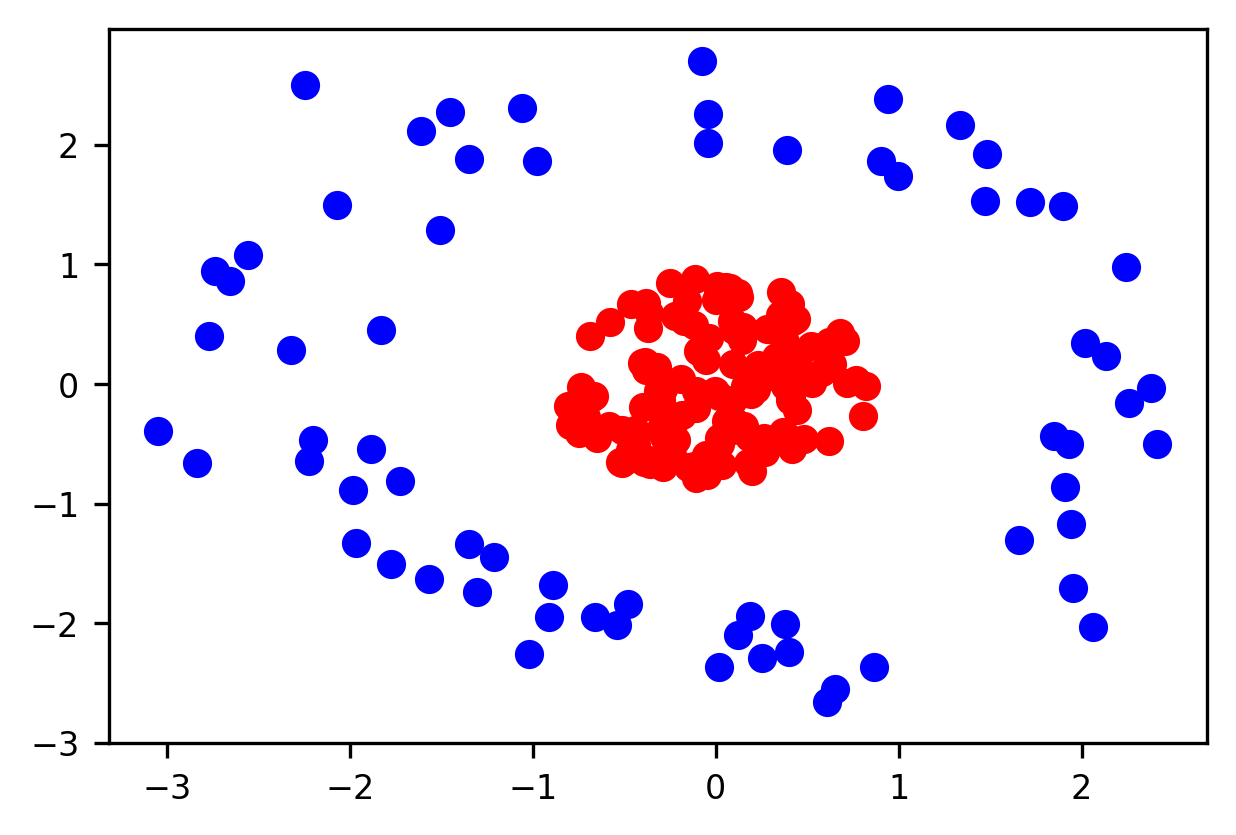

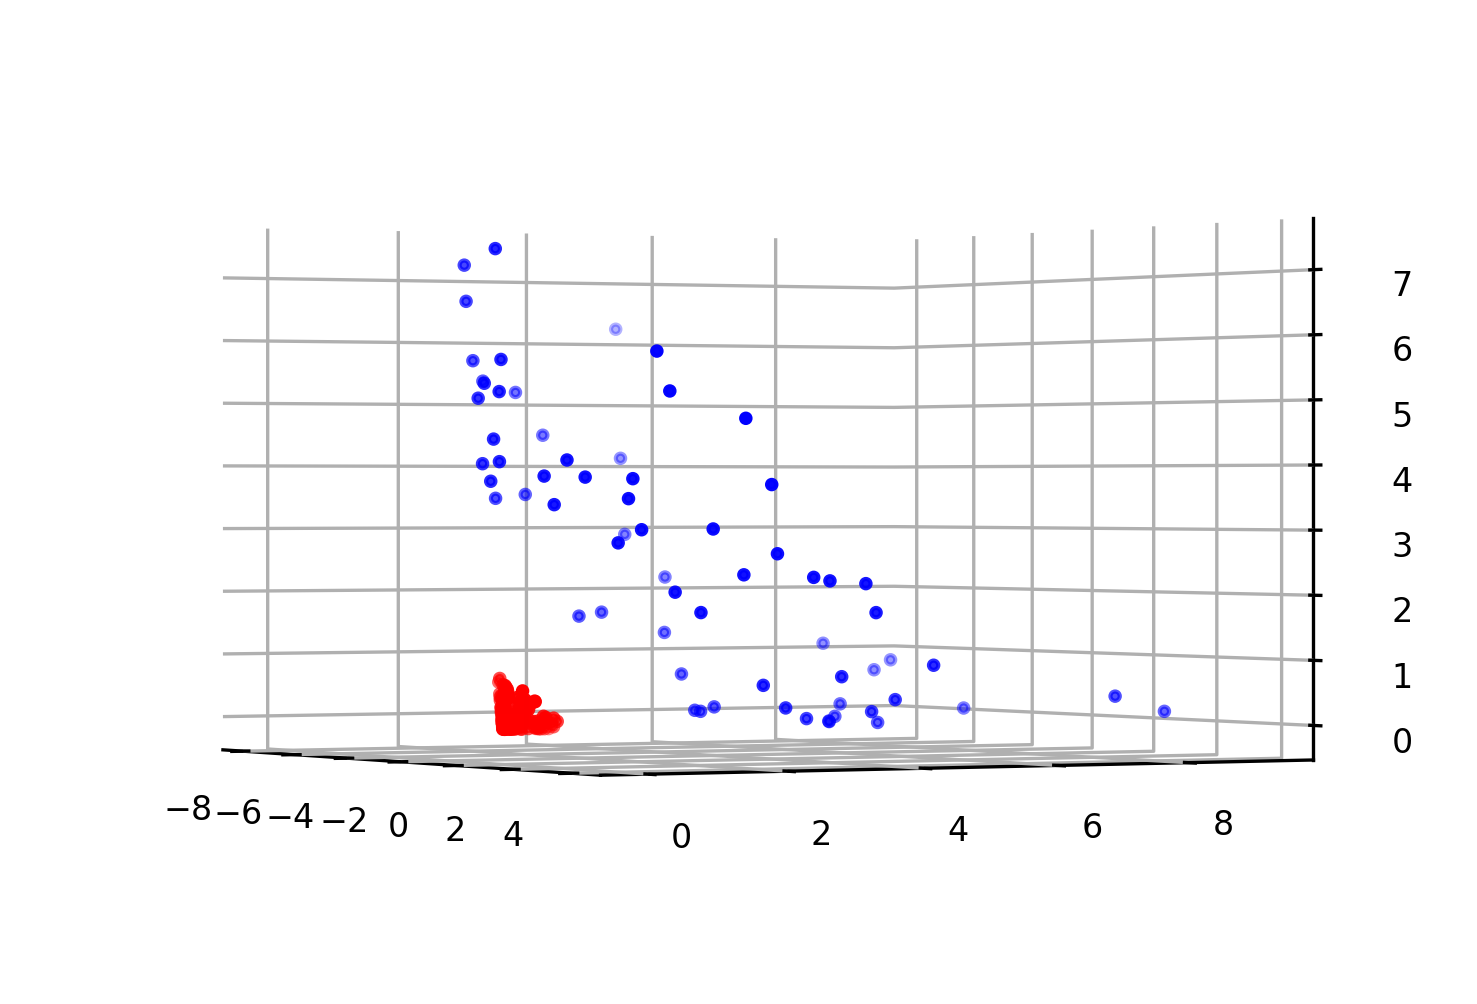

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mul_list(a,b,c=1):
    mul_list = []
    for i in range(0,len(a)):
        mul_list.append(a[i]*b[i]*c)
    return mul_list

def sum_list(a,b):
    sum_list = []
    for i in range(0,len(a)):
        sum_list.append(a[i]+b[i])
    return sum_list
    

np.random.seed(0)
points = np.random.randn(400,2)

o_circle_x = []
i_circle_x = []
o_circle_y = []
i_circle_y = []

for p in points:
    if (p[0]+0.0)**2+(p[1]+0.0)**2 > 3.5:
        o_circle_x.append(p[0])
        o_circle_y.append(p[1])
    if (p[0]+0.0)**2+(p[1]+0.0)**2 < 0.8:
        i_circle_x.append(p[0])
        i_circle_y.append(p[1])

x_o = mul_list(o_circle_x,o_circle_x)
y_o = mul_list(o_circle_y,o_circle_y)
z_o = mul_list(o_circle_x,o_circle_y, 1.414)

x_i = mul_list(i_circle_x,i_circle_x)
y_i = mul_list(i_circle_y,i_circle_y)
z_i = mul_list(i_circle_x,i_circle_y, 1.414)

z1 = sum_list(x_o,y_o)
z2 = sum_list(x_i,y_i)

fs=(cm2inch(12,8))
fig, ax=plt.subplots(figsize=fs, dpi=DPI)
ax.scatter(o_circle_y, o_circle_x, c='b',marker='o')
ax.scatter(i_circle_y, i_circle_x, c='r',marker='o')
plt.ylim(-3.0)
fig.savefig('5.2.png')

x_o = mul_list(o_circle_x,o_circle_x)
y_o = mul_list(o_circle_y,o_circle_y)
z_o = mul_list(o_circle_x,o_circle_y, 1.414)

x_i = mul_list(i_circle_x,i_circle_x)
y_i = mul_list(i_circle_y,i_circle_y)
z_i = mul_list(i_circle_x,i_circle_y, 1.414)

z1 = sum_list(x_o,y_o)
z2 = sum_list(x_i,y_i)

fs=(cm2inch(12,8))
fig,ax=plt.subplots(figsize=fs, dpi=DPI)
ax = Axes3D(fig)
ax.view_init(0, -30)
# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

#ax.scatter(z1, o_circle_y, o_circle_x, c='b',marker='o')
#ax.scatter(z2, i_circle_y, i_circle_x, c='r',marker='o')
ax.scatter(z_o, y_o, x_o, c='b',marker='.')
ax.scatter(z_i, y_i, x_i, c='r',marker='.')
fig.savefig('4.3.png')
plt.show()


In [ ]:
#Scarichiamo il dataset Mnist attraverso il modulo di sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", cache=True)

print(mnist.data.shape)
print(mnist.target.shape)

#Suddividiamo il dataset in variabili di input e di output
X = mnist.data
y = mnist.target 

(70000, 784)
(70000,)


In [ ]:
"""#Suddividiamo il dataset in training_set e validation set 
from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.50, random_state=0)
"""

'#Suddividiamo il dataset in training_set e validation set \nfrom sklearn.model_selection import train_test_split\nX, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.50, random_state=0)\n'

In [ ]:
"""from sklearn import svm

#C equivale al parametro lambda
#di default per il problema multiclasse si utilizza la strategia OvR
classifier = svm.SVC(C=100.0, kernel='rbf', verbose=1, gamma=0.0000001) 
classifier.fit(X,y)
"""

"from sklearn import svm\n\n#C equivale al parametro lambda\n#di default per il problema multiclasse si utilizza la strategia OvR\nclassifier = svm.SVC(C=100.0, kernel='rbf', verbose=1, gamma=0.0000001) \nclassifier.fit(X,y)\n"

In [ ]:
"""
from sklearn.metrics import confusion_matrix, classification_report

#Training accuracy
count = 0
for i in range(len(y)):
  value = classifier.predict(X[[i]])  
  if value == y[i]: 
    count = count + 1
print(count/len(y))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = classifier.predict(X_val[[i]])  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

ypred = classifier.predict(X_val)
print(confusion_matrix(y_val,ypred))
print(classification_report(y_val, ypred))
"""

'\nfrom sklearn.metrics import confusion_matrix, classification_report\n\n#Training accuracy\ncount = 0\nfor i in range(len(y)):\n  value = classifier.predict(X[[i]])  \n  if value == y[i]: \n    count = count + 1\nprint(count/len(y))\n\n#Validation accuracy\ncount = 0\nfor i in range(len(y_val)):\n  value = classifier.predict(X_val[[i]])  \n  if value == y_val[i]: \n    count = count + 1\nprint(count/len(y_val))\n\nypred = classifier.predict(X_val)\nprint(confusion_matrix(y_val,ypred))\nprint(classification_report(y_val, ypred))\n'

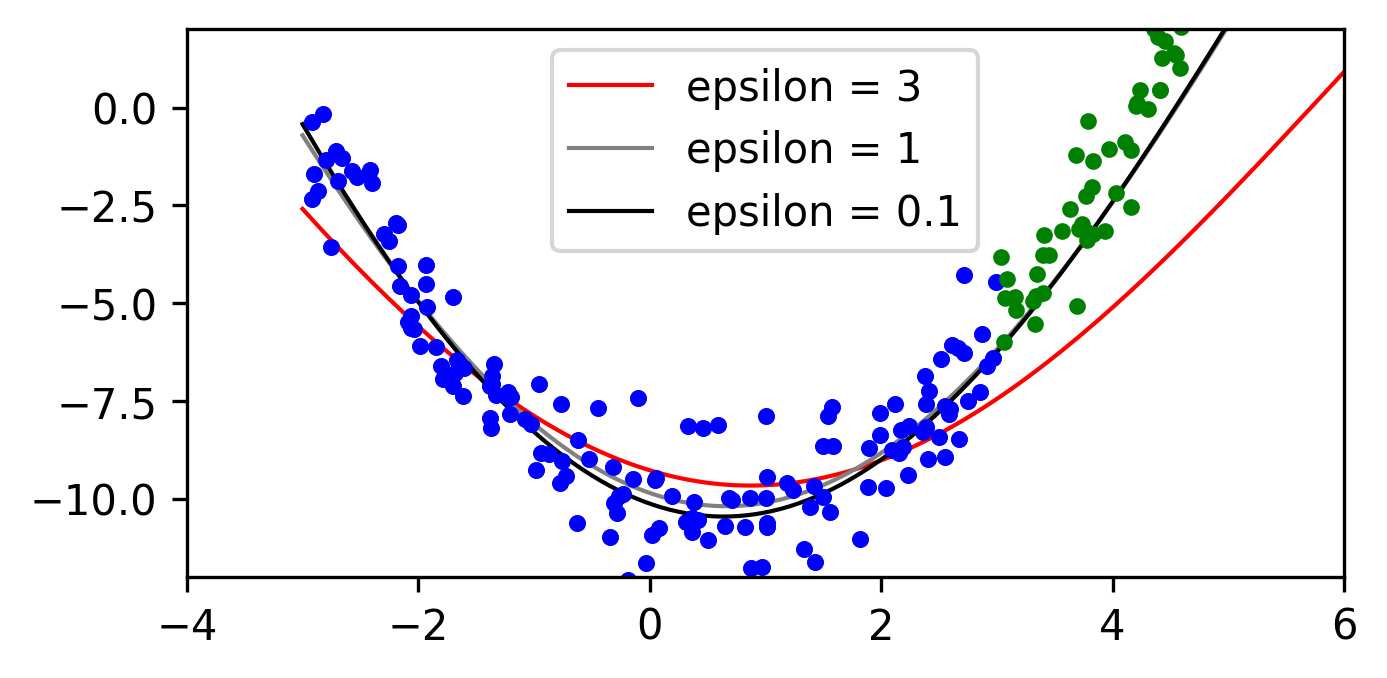

In [ ]:
import numpy as np

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn import svm

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -12, 2])

def plot_model(alphas, d=12):
  styles = ['black','gray','red']
  for a in alphas:
    reg_model = svm.SVR(epsilon=a, gamma=0.01, C=100)
    reg_model.fit(x.reshape(-1,1),y)
    y_new = reg_model.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1, label='epsilon = ' + str(a))    
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  ax.legend()
  plt.show()
  fig.savefig('4.4.png')

plot_model([3, 1, 0.1])

In [ ]:
#Suddividiamo il dataset in training_set e validation set 
from sklearn.model_selection import train_test_split
X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.15, random_state=0)

from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#Training accuracy
count = 0
for i in range(len(y)):
  value = dtree.predict(X[[i]])  
  if value == y[i]: 
    count = count + 1
print(count/len(y))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = dtree.predict(X_val[[i]])  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

ypred = dtree.predict(X_val)
print(confusion_matrix(y_val,ypred))
print(classification_report(y_val, ypred))

0.9132773109243697
0.867904761904762
[[ 977    1   16    4    5   14   10    9    9    7]
 [   0 1145   11    9    7    1    1    6   11    1]
 [  17   10  932   16    8    9   34   36   22    8]
 [   5    6   51  856    5   46   10   25   23   25]
 [   7    1    2    6  875    6   14    5   23   64]
 [  16   13   14   63   12  734   21    4   28   19]
 [  14    6   17    6   28   30  922    3   14    3]
 [   1    6   54    7   23    5    3  988    9   24]
 [   6   25   25   21   17   18   19    5  826   48]
 [   9    5    9   18   46   13    4   26   24  858]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1052
           1       0.94      0.96      0.95      1192
           2       0.82      0.85      0.84      1092
           3       0.85      0.81      0.83      1052
           4       0.85      0.87      0.86      1003
           5       0.84      0.79      0.82       924
           6       0.89      0.88      0.89      1043

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

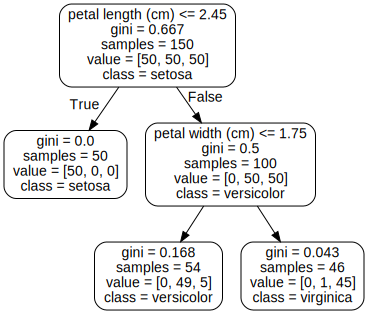

In [ ]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=False
    )

Source.from_file("iris_tree.dot")

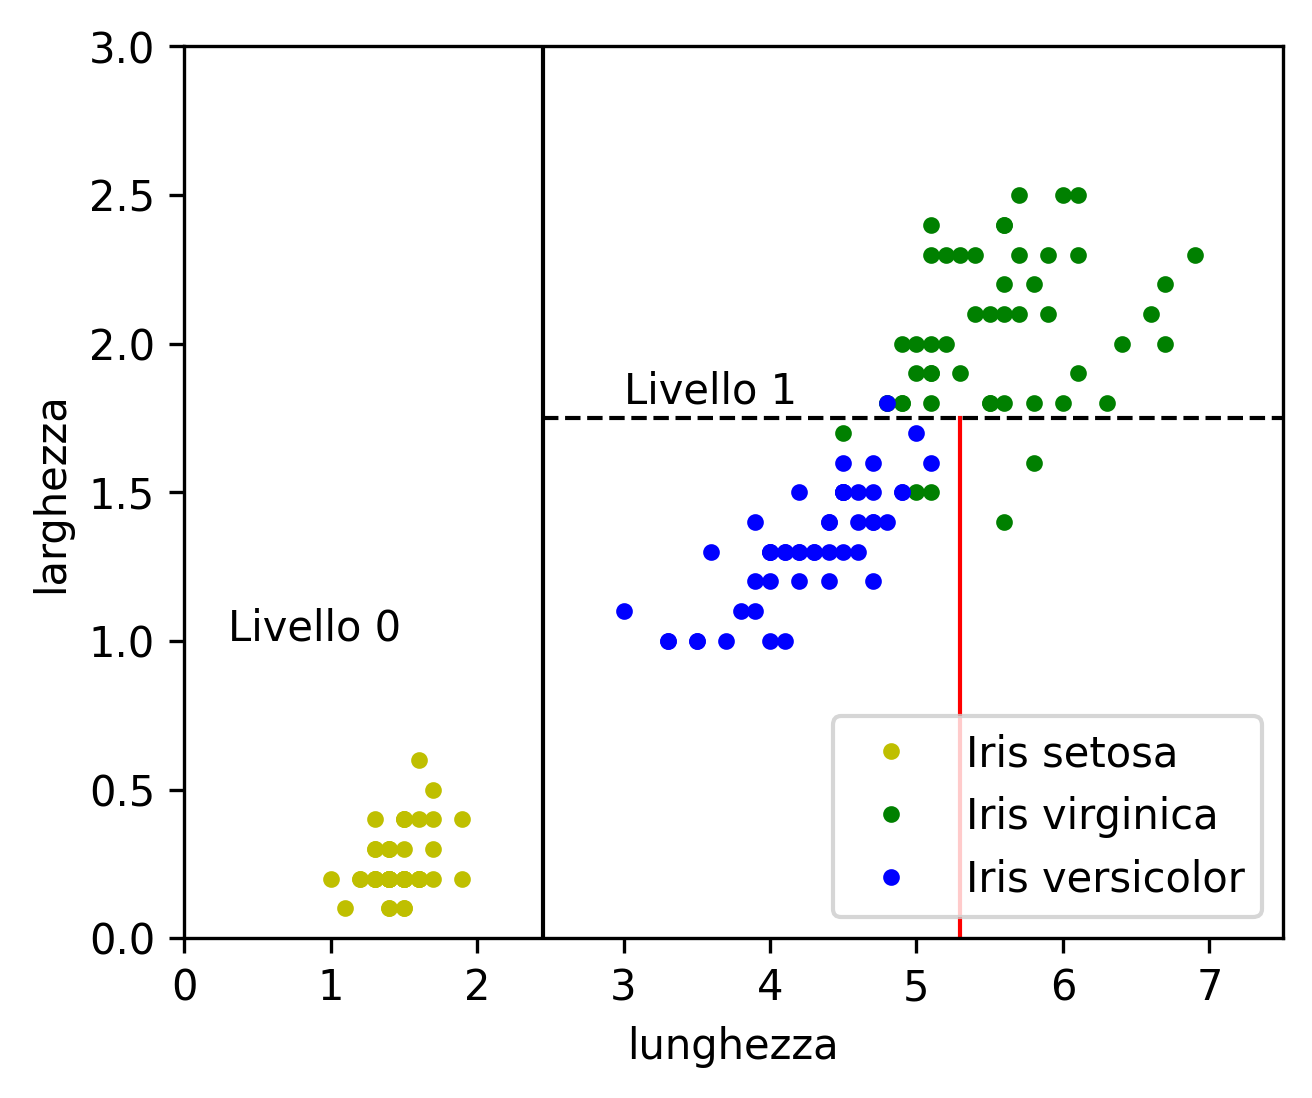

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)    
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.", label="Iris setosa")        
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g.", label="Iris virginica")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.", label="Iris versicolor")
        plt.axis(axes)
    if iris:
        plt.xlabel("lunghezza", fontsize=10)
        plt.ylabel("larghezza", fontsize=10)
    else:
        plt.xlabel(r"$x_1$", fontsize=10)
        plt.ylabel(r"$x_2$", fontsize=10, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=10)

fs=(cm2inch(12,10))
plt.figure(dpi=DPI, figsize=fs)
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=1)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=1)
plt.plot([5.3, 5.3],[0,1.75], "r-", linewidth=1)
plt.text(0.30, 1.0, "Livello 0", fontsize=10)
plt.text(3.0, 1.80, "Livello 1", fontsize=10)
plt.savefig('4.7.png')

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()




No handles with labels found to put in legend.


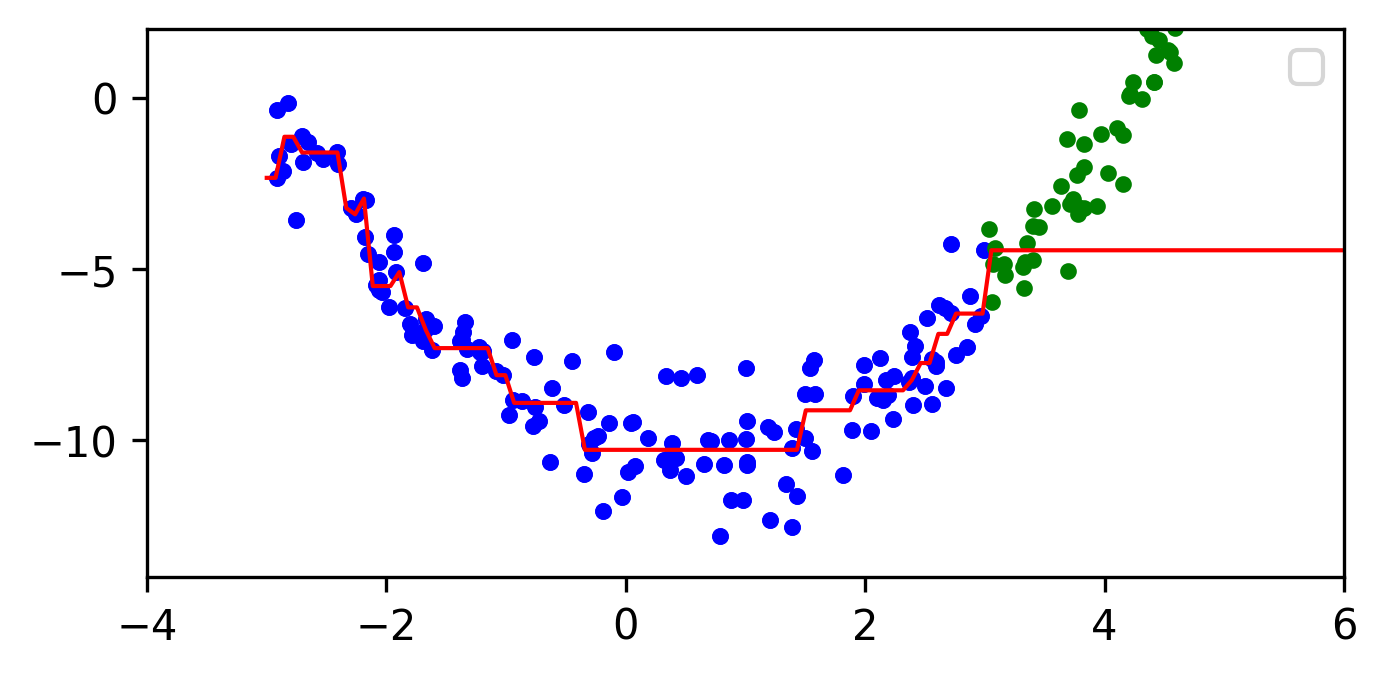

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn import svm

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -14, 2])

def plot_model(alphas, d=12):
  styles = ['gray','black','red']
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  for a in alphas:
    reg_model = DecisionTreeRegressor(max_depth=a)
    reg_model.fit(x.reshape(-1,1),y)
    y_new = reg_model.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1)#, label='epsilon = ' + str(a))  
  ax.legend()
  plt.show()
  fig.savefig('5.3.png')

plot_model([5])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as zo
import numpy as np

X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.50, random_state=0)

clf = RandomForestClassifier(max_depth=10, bootstrap=True, 
                             n_estimators=300, n_jobs=-1, 
                             max_features='sqrt', 
                             criterion='entropy',
                             oob_score=True)
clf.fit(X,y)
train_preds = clf.predict(X)
print(zo(train_preds, y))
test_preds = clf.predict(X_val)
print(zo(test_preds, y_val))

0.9773428571428572
0.9466285714285714


No handles with labels found to put in legend.


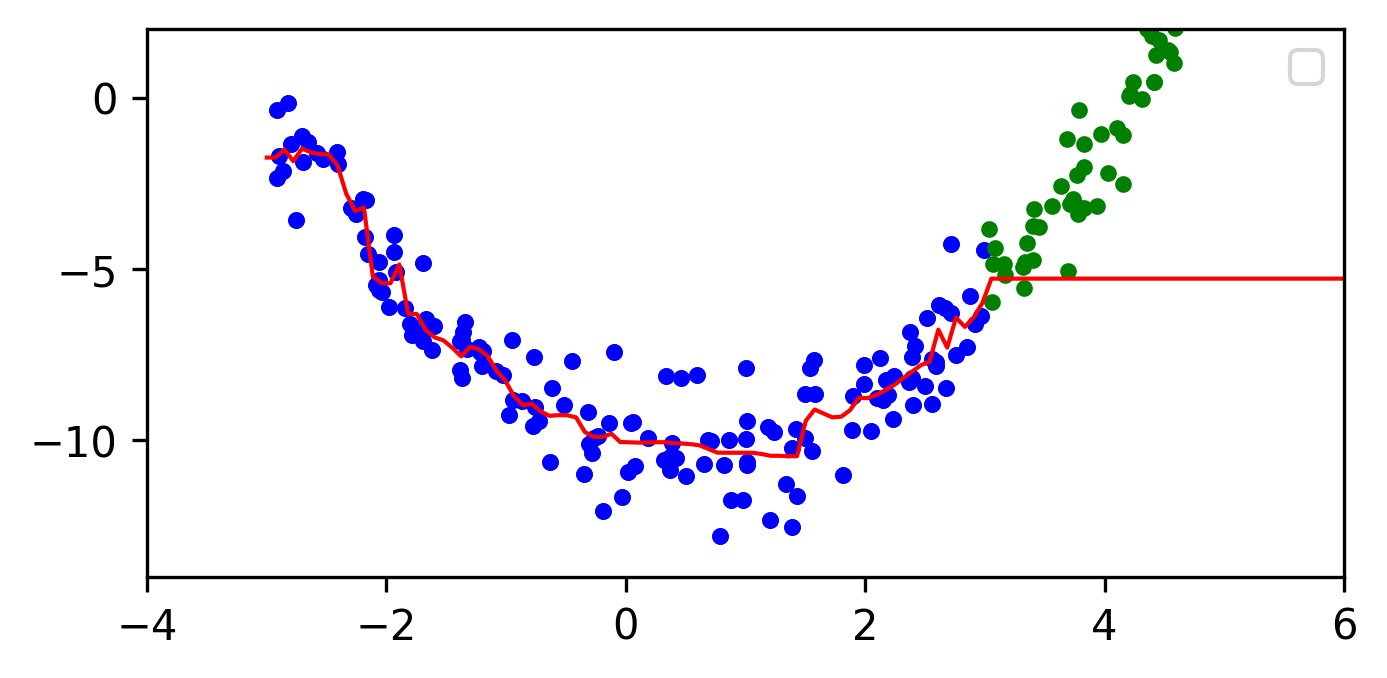

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn import svm

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -14, 2])

def plot_model(alphas, d=12):
  styles = ['gray','black','red']
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  for a in alphas:
    reg_model = RandomForestRegressor(max_depth=5, bootstrap=True, 
                             n_estimators=100, n_jobs=-1, 
                             max_features='sqrt', 
                             criterion='mse',
                             oob_score=True)
    reg_model.fit(x.reshape(-1,1) ,y)
    y_new = reg_model.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1)#, label='epsilon = ' + str(a))  
  ax.legend()
  plt.show()
  fig.savefig('5.4.png')

plot_model([5])

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score as zo
import numpy as np

X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.50, random_state=0)

clf = ExtraTreesClassifier(max_depth=10, bootstrap=True, 
                             n_estimators=300, n_jobs=-1, 
                             max_features='sqrt', 
                             criterion='entropy',
                             oob_score=True)
clf.fit(X,y)
train_preds = clf.predict(X)
print(zo(train_preds, y))
test_preds = clf.predict(X_val)
print(zo(test_preds, y_val))

0.9646
0.9376285714285715


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score as zo
from sklearn.model_selection import train_test_split
import numpy as np

X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.80, random_state=0)
clf = GradientBoostingClassifier(n_estimators=110, learning_rate=0.05, 
                                 max_depth=4, random_state=0,                                 
                                 subsample= 0.5, verbose=1)
clf.fit(X, y)

train_preds = clf.predict(X)
print(zo(train_preds, y))
test_preds = clf.predict(X_val)
print(zo(test_preds, y_val))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       14294.1496        1720.9385            9.52m
         2       13031.6709        1234.7758            9.43m
         3       11966.8459         996.1827            9.35m
         4       11148.2061         793.7333            9.28m
         5       10422.5573         698.9175            9.20m
         6        9853.1940         614.5065            9.12m
         7        9188.2383         540.9591            9.05m
         8        8706.0835         482.0058            8.96m
         9        8245.1649         434.4454            8.87m
        10        7776.6281         418.1883            8.76m
        20        4966.4696         191.7340            7.79m
        30        3486.9071          96.0705            6.93m
        40        2665.1606          49.9950            6.06m
        50        2039.7987          30.0966            5.17m
        60        1733.6366          18.7487            4.30m
       

In [ ]:
from sklearn import svm

X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.99, random_state=0)
#C equivale al parametro lambda
#di default per il problema multiclasse si utilizza la strategia OvR
classifier = svm.SVC(C=100.0, kernel='rbf', verbose=1, gamma=0.0000001, probability = True) 
classifier.fit(X,y)

print('')
print(classifier.predict(X)[42])
print(classifier.predict_proba(X)[42])
print(y[42])



[LibSVM]
9
[0.00814221 0.00092368 0.01681774 0.01136422 0.02047666 0.00875825
 0.00739015 0.0075795  0.01089582 0.90765177]
9


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.metrics import accuracy_score as zo
from sklearn.model_selection import train_test_split
import numpy as np

X, X_val, y, y_val = train_test_split(mnist.data, mnist.target, test_size=0.80, random_state=0)

dtrain = xgboost.DMatrix(X, label=y)
dval = xgboost.DMatrix(X_val, label=y_val)
params = {'max_depth': 5,                 # the maximum depth of each tree
          'eta': 0.5,                     # the training step for each iteration
          'eta_decay': 0.9,
          'min_eta': 0.05,
          'silent': 0,                    # logging mode - quiet
          'objective': 'multi:softmax',   # multiclass classification using the softmax objective
          'num_class': 10,                 # the number of classes that exist in this datset
          'early_stopping_rounds': 10,
          'n_estimators': 5000
          }  

def eval_acc(preds, dtrain):
    labels = dtrain.get_label()
    return 'acc', zo(labels, preds)

results = {}
model = xgboost.train(params, dtrain, num_boost_round=100, evals=[(dval, 'val')], evals_result=results, feval=eval_acc)

[0]	val-merror:0.195518	val-acc:0.804482
[1]	val-merror:0.142268	val-acc:0.857732
[2]	val-merror:0.120464	val-acc:0.879536
[3]	val-merror:0.10775	val-acc:0.89225
[4]	val-merror:0.099464	val-acc:0.900536
[5]	val-merror:0.091821	val-acc:0.908179
[6]	val-merror:0.085107	val-acc:0.914893
[7]	val-merror:0.080268	val-acc:0.919732
[8]	val-merror:0.075768	val-acc:0.924232
[9]	val-merror:0.072214	val-acc:0.927786
[10]	val-merror:0.069232	val-acc:0.930768
[11]	val-merror:0.066661	val-acc:0.933339
[12]	val-merror:0.064714	val-acc:0.935286
[13]	val-merror:0.062589	val-acc:0.937411
[14]	val-merror:0.060732	val-acc:0.939268
[15]	val-merror:0.059589	val-acc:0.940411
[16]	val-merror:0.05825	val-acc:0.94175
[17]	val-merror:0.056446	val-acc:0.943554
[18]	val-merror:0.055	val-acc:0.945
[19]	val-merror:0.054786	val-acc:0.945214
[20]	val-merror:0.053589	val-acc:0.946411
[21]	val-merror:0.052821	val-acc:0.947179
[22]	val-merror:0.052	val-acc:0.948
[23]	val-merror:0.050982	val-acc:0.949018
[24]	val-merror:0.